In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

from lib.creditcard_fraud_dataset import get_train_test_dfs, X_COLS
from lib.cs_eval import evaluate_pred

# 5. AdaBoost with cost-sensitive weight initialization

AdaBoost is an ensemble of *weak* classifiers. Each of these weak classifiers is trained on a weighted version of the original dataset, where samples that are poorly classified by the ensemble of the previous classifiers are weighted more than others. For the initial classifier, all samples are weighted equally.

An easy way to make the ensemble cost-sensitive is to use the **misclassification costs as initial sample weights**.

In [2]:
df_train, df_test = get_train_test_dfs()

## 5.1 Train

To train an AdaBoost classifier with SciKit-Learn, we can use the [`AdaBoostClassifier` class](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html). By default, this creates an ensemble of 50 decision tree classifiers (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)) of depth 1.

We will train two AdaBoost classifiers: one *without* sample weighting, and one *with* sample weighting.

In [3]:
X_train = df_train[X_COLS]
y_train = df_train['Class']

clf_ada_unweighted = AdaBoostClassifier()
clf_ada_unweighted.fit(X_train, y_train)

clf_ada_weighted = AdaBoostClassifier()
clf_ada_weighted.fit(X_train, y_train, sample_weight=df_train['C_misclf'])

AdaBoostClassifier()

## 5.2 Evaluate

In [4]:
X_test = df_test[X_COLS]
y_test = df_test['Class']

# Predictions with and without weighting
y_pred_unweighted = clf_ada_unweighted.predict(X_test)
y_pred_weighted = clf_ada_weighted.predict(X_test)

# Get the transaction amounts
amounts = df_test['Amount']

# Compute metrics for each classifier
eval_metrics_unweighted = evaluate_pred(y_test, y_pred_unweighted, amounts)
eval_metrics_weighted   = evaluate_pred(y_test, y_pred_weighted,   amounts)

In [5]:
df = pd.DataFrame([
    {
        'Method': 'AdaBoost Unweighted',
        **eval_metrics_unweighted
    },
    {
        'Method': 'AdaBoost, CS Weighted',
        **eval_metrics_weighted
    }
])

In [6]:
df

,Method,Cost Precision,Cost Recall,TP Amount,FP Amount,FN Amount,Net Recovered Amount
0,AdaBoost Unweighted,0.996552,0.739843,23124.97,80.0,8131.60,14913.37
1,"AdaBoost, CS Weighted",0.984734,0.829622,25931.15,402.0,5325.42,20203.73


<AxesSubplot:xlabel='Method', ylabel='Cost Recall'>

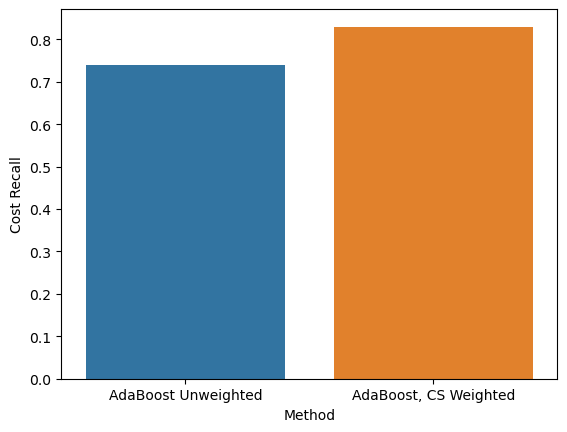

In [7]:
sns.barplot(data=df, x='Method', y='Cost Recall')

<AxesSubplot:xlabel='Method', ylabel='Cost Precision'>

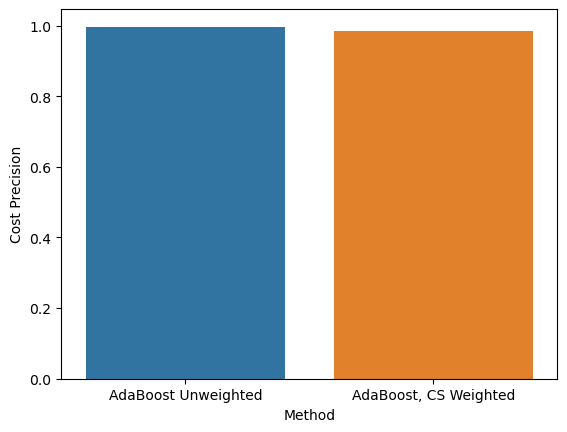

In [8]:
sns.barplot(data=df, x='Method', y='Cost Precision')